In [1]:
import os
import xarray as xr
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
from windrose import WindroseAxes

repertoire_courant=os.getcwd()
repertoire_figures=repertoire_courant+r"\\"+r"figures"+r"\\"
print(repertoire_courant)
repertoire_fichiers=repertoire_courant+r"\Outputs_EddyPro"+r"\\"
print("chargement des données")

T2_1_30min_brut=xr.open_dataset(repertoire_courant+r'\\'+r"flux_brut_T2TO5_1.nc")
T2_2_30min_brut=xr.open_dataset(repertoire_courant+r'\\'+r"flux_brut_T2TO5_2.nc")
T2_3_30min_brut=xr.open_dataset(repertoire_courant+r'\\'+r"flux_brut_T2TO5_3.nc")

T2_1_30min=xr.open_dataset(repertoire_fichiers+r"T2_TO5_1_30min_full_output.nc")
T2_2_30min=xr.open_dataset(repertoire_fichiers+r"T2_TO5_2_30min_full_output.nc")
T2_3_30min=xr.open_dataset(repertoire_fichiers+r"T2_TO5_3_30min_full_output.nc")

T2_1_30min=T2_1_30min.assign(wind_dir=(T2_1_30min['wind_dir']+180)%360)
T2_2_30min=T2_2_30min.assign(wind_dir=(T2_2_30min['wind_dir']+180)%360)
T2_3_30min=T2_3_30min.assign(wind_dir=(T2_3_30min['wind_dir']+180)%360)


print(T2_1_30min.data_vars)
print(T2_1_30min_brut.data_vars)
print(T2_1_30min_brut)
print("fait")

C:\Users\evanl\Documents\Stage IGE
chargement des données
Data variables:
    daytime                  (temps) int64 ...
    Tau                      (temps) float64 ...
    qc_Tau                   (temps) int64 ...
    H                        (temps) float64 ...
    qc_H                     (temps) int64 ...
    H_strg                   (temps) float64 ...
    sonic_temperature        (temps) float64 ...
    air_temperature          (temps) float64 ...
    air_pressure             (temps) float64 ...
    air_density              (temps) float64 ...
    air_heat_capacity        (temps) float64 ...
    air_molar_volume         (temps) float64 ...
    es                       (temps) float64 ...
    u_unrot                  (temps) float64 ...
    v_unrot                  (temps) float64 ...
    w_unrot                  (temps) float64 ...
    u_rot                    (temps) float64 ...
    v_rot                    (temps) float64 ...
    w_rot                    (temps) float64 ...
 

In [2]:
def R_2(model,data):
    #retourne le coef. de correlation R^2
    masque= np.array(np.isnan(model) | np.isnan(data))#on enlève les NaN
    new_model=np.ma.array(model,mask=masque).compressed()
    new_data=np.ma.array(data,mask=masque).compressed()
    return scipy.stats.linregress(new_model,new_data).rvalue**2
print(R_2([np.NaN,0,6],[0,8,9]))

1.0


niveau 1 : RMSE= 0.0007321561144759595 W/m^2


Text(10, 6, '$R^2$ = 0.624')

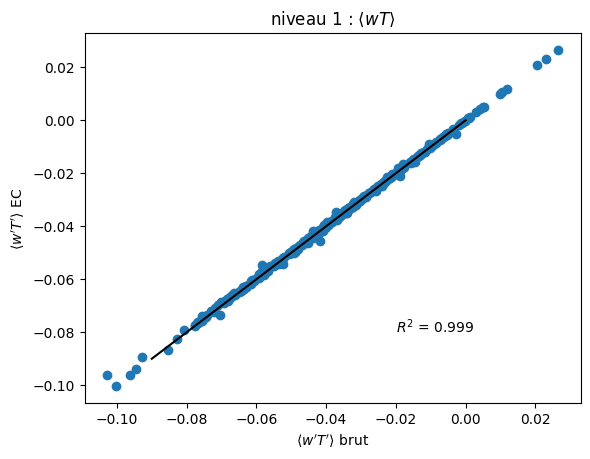

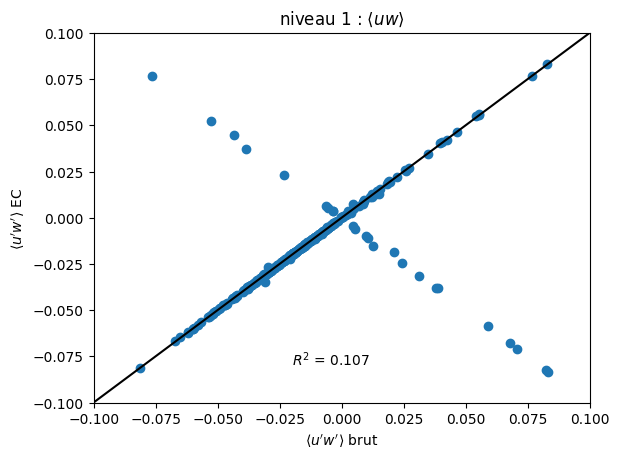

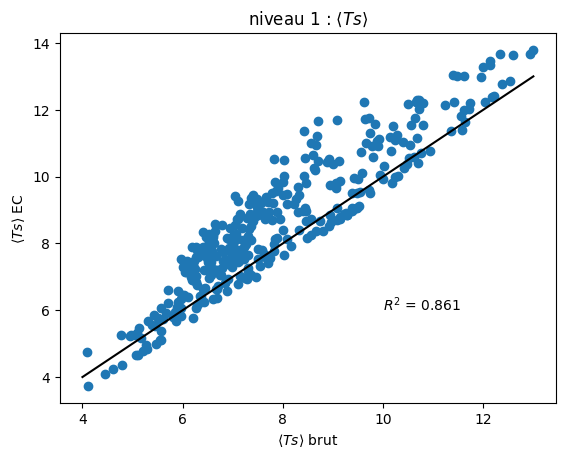

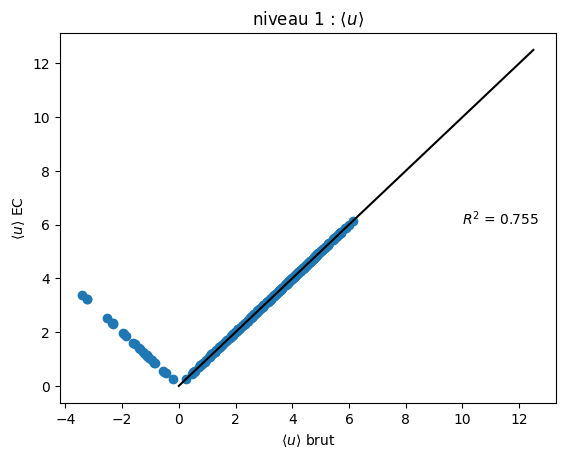

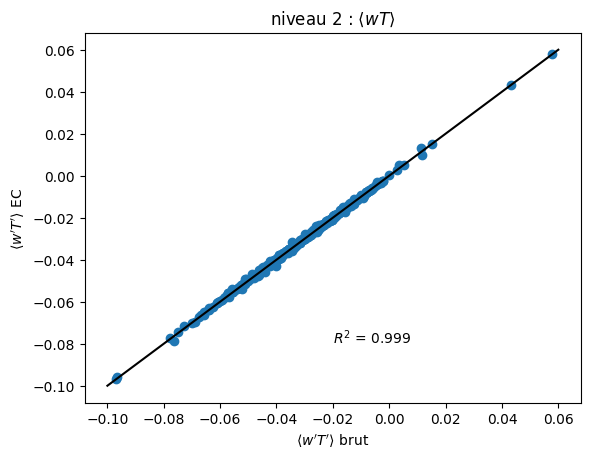

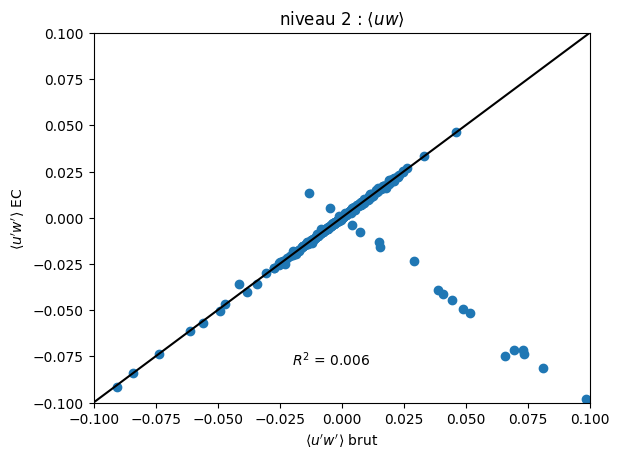

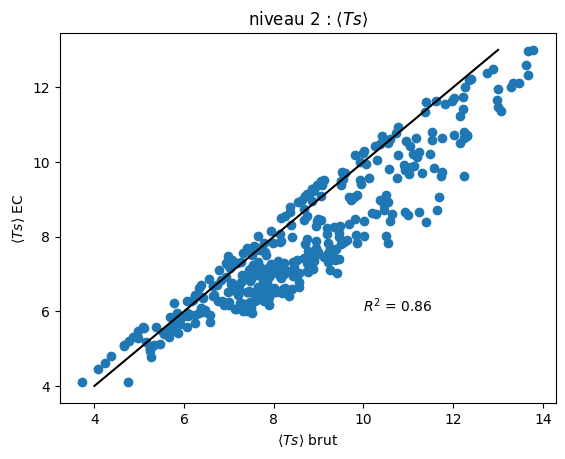

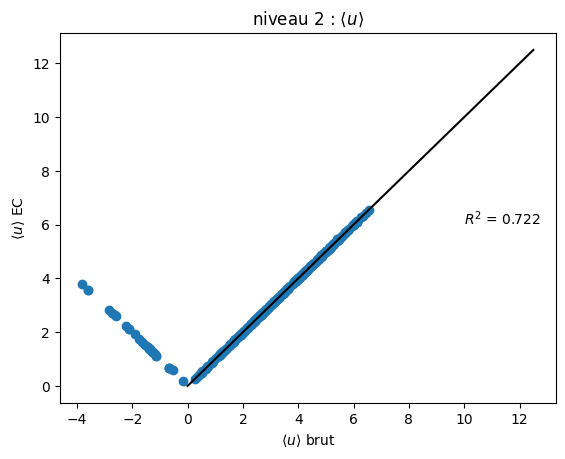

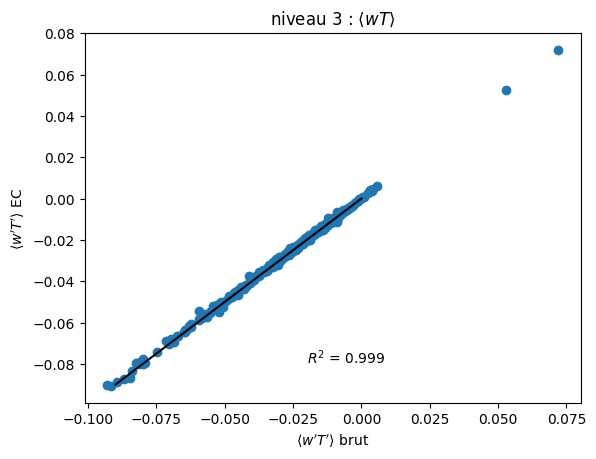

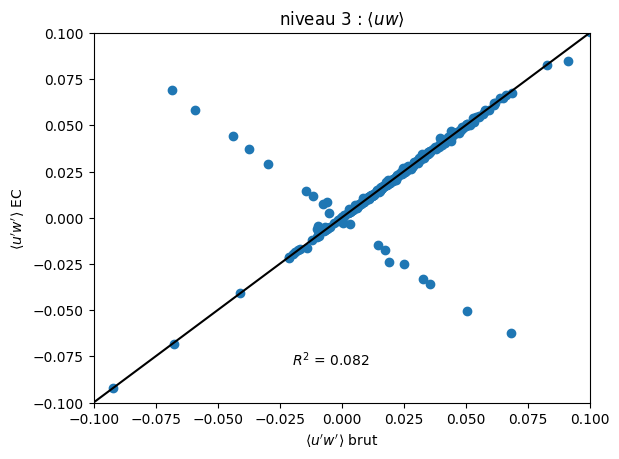

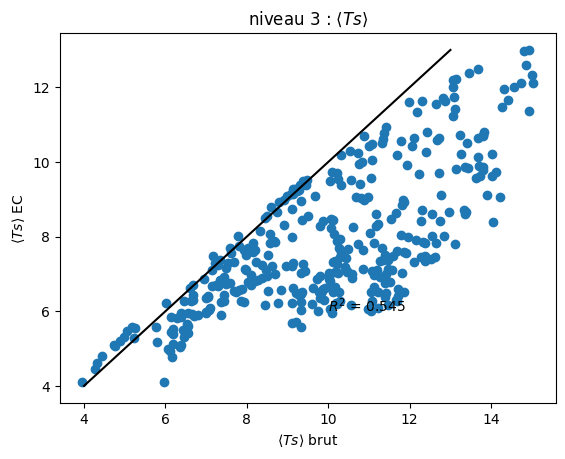

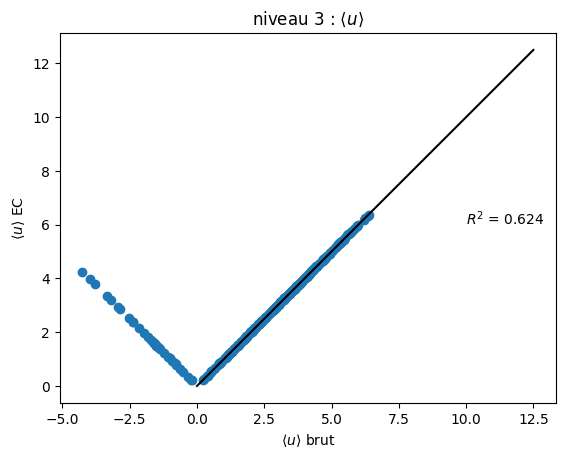

In [3]:
import Bulk

fig=plt.figure()
x=np.linspace(-0.09,0.0)
plt.title(r"niveau 1 : $\langle wT \rangle$")
plt.scatter(T2_1_30min_brut['wts_cov'].values,T2_1_30min['wts_cov'].values)
plt.xlabel(r"$\langle w'T'\rangle$ brut")
plt.ylabel(r"$\langle w'T'\rangle$ EC")
plt.plot(x,x,color='k')
plt.text(-0.02,-0.08,r"$R^2$ = {}".format(np.around(R_2(T2_1_30min_brut['wts_cov'].values,T2_1_30min['wts_cov'].values),3)))

print(f"niveau 1 : RMSE= {Bulk.RMSE(T2_1_30min_brut['wts_cov'].values,T2_1_30min['wts_cov'].values)} W/m^2")


fig=plt.figure()
plt.title(r"niveau 1 : $\langle uw \rangle$")
x=np.linspace(-0.2,0.2)
plt.scatter(T2_1_30min_brut['wu_cov'].values,T2_1_30min['wu_cov'].values)
plt.xlabel(r"$\langle u'w'\rangle$ brut")
plt.ylabel(r"$\langle u'w'\rangle$ EC")
plt.plot(x,x,color='k')
plt.text(-0.02,-0.08,r"$R^2$ = {}".format(np.around(R_2(T2_1_30min_brut['wu_cov'].values,T2_1_30min['wu_cov'].values),3)))
plt.xlim(-0.1,0.1)
plt.ylim(-0.1,0.1)

fig=plt.figure()
x=np.linspace(4,13)
plt.title(r"niveau 1 : $\langle Ts \rangle$")
plt.scatter(T2_1_30min_brut['ts_mean'].values-273.15,T2_1_30min['ts_mean'].values-273.15)
plt.xlabel(r"$\langle Ts\rangle$ brut")
plt.ylabel(r"$\langle Ts\rangle$ EC")
plt.plot(x,x,color='k')
plt.text(10,6,r"$R^2$ = {}".format(np.around(R_2(T2_1_30min_brut['ts_mean'].values-273.15,T2_1_30min['ts_mean'].values-273.15),3)))

fig=plt.figure()
x=np.linspace(0,12.5)
plt.title(r"niveau 1 : $\langle u \rangle$")
plt.scatter(T2_1_30min_brut['u_rot'].values,T2_1_30min['u_rot'].values)
plt.xlabel(r"$\langle u\rangle$ brut")
plt.ylabel(r"$\langle u\rangle$ EC")
plt.plot(x,x,color='k')
plt.text(10,6,r"$R^2$ = {}".format(np.around(R_2(T2_1_30min_brut['u_rot'].values,T2_1_30min['u_rot'].values),3)))



fig=plt.figure()
x=np.linspace(-0.1,0.06)
plt.title(r"niveau 2 : $\langle wT\rangle $")
plt.scatter(T2_2_30min_brut['wts_cov'].values,T2_2_30min['wts_cov'].values)
plt.xlabel(r"$\langle w'T'\rangle$ brut")
plt.ylabel(r"$\langle w'T'\rangle$ EC")
plt.plot(x,x,color='k')
plt.text(-0.02,-0.08,r"$R^2$ = {}".format(np.around(R_2(T2_2_30min_brut['wts_cov'].values,T2_2_30min['wts_cov'].values),3)))

fig=plt.figure()
plt.title(r"niveau 2 : $\langle uw\rangle $")
x=np.linspace(-0.2,0.2)
plt.scatter(T2_2_30min_brut['wu_cov'].values,T2_2_30min['wu_cov'].values)
plt.xlabel(r"$\langle u'w'\rangle$ brut")
plt.ylabel(r"$\langle u'w'\rangle$ EC")
plt.plot(x,x,color='k')
plt.text(-0.02,-0.08,r"$R^2$ = {}".format(np.around(R_2(T2_2_30min_brut['wu_cov'].values,T2_2_30min['wu_cov'].values),3)))
plt.xlim(-0.1,0.1)
plt.ylim(-0.1,0.1)

fig=plt.figure()
x=np.linspace(4,13)
plt.title(r"niveau 2 : $\langle Ts \rangle$")
plt.scatter(T2_2_30min_brut['ts_mean'].values-273.15,T2_2_30min['ts_mean'].values-273.15)
plt.xlabel(r"$\langle Ts\rangle$ brut")
plt.ylabel(r"$\langle Ts\rangle$ EC")
plt.plot(x,x,color='k')
plt.text(10,6,r"$R^2$ = {}".format(np.around(R_2(T2_2_30min_brut['ts_mean'].values-273.15,T2_2_30min['ts_mean'].values-273.15),3)))

fig=plt.figure()
x=np.linspace(0,12.5)
plt.title(r"niveau 2 : $\langle u \rangle$")
plt.scatter(T2_2_30min_brut['u_rot'].values,T2_2_30min['u_rot'].values)
plt.xlabel(r"$\langle u\rangle$ brut")
plt.ylabel(r"$\langle u\rangle$ EC")
plt.plot(x,x,color='k')
plt.text(10,6,r"$R^2$ = {}".format(np.around(R_2(T2_2_30min_brut['u_rot'].values,T2_2_30min['u_rot'].values),3)))

fig=plt.figure()
x=np.linspace(-0.09,0.0)
plt.title(r"niveau 3 : $\langle wT \rangle$")
plt.scatter(T2_3_30min_brut['wts_cov'].values,T2_3_30min['wts_cov'].values)
plt.xlabel(r"$\langle w'T'\rangle$ brut")
plt.ylabel(r"$\langle w'T'\rangle$ EC")
plt.plot(x,x,color='k')
plt.text(-0.02,-0.08,r"$R^2$ = {}".format(np.around(R_2(T2_3_30min_brut['wts_cov'].values,T2_3_30min['wts_cov'].values),3)))

fig=plt.figure()
plt.title(r"niveau 3 : $\langle uw \rangle$")
x=np.linspace(-0.2,0.2)
plt.scatter(T2_3_30min_brut['wu_cov'].values,T2_3_30min['wu_cov'].values)
plt.xlabel(r"$\langle u'w'\rangle$ brut")
plt.ylabel(r"$\langle u'w'\rangle$ EC")
plt.plot(x,x,color='k')
plt.text(-0.02,-0.08,r"$R^2$ = {}".format(np.around(R_2(T2_3_30min_brut['wu_cov'].values,T2_3_30min['wu_cov'].values),3)))
plt.xlim(-0.1,0.1)
plt.ylim(-0.1,0.1)

fig=plt.figure()
x=np.linspace(4,13)
plt.title(r"niveau 3 : $\langle Ts \rangle$")
plt.scatter(T2_3_30min_brut['ts_mean'].values-273.15,T2_3_30min['ts_mean'].values-273.15)
plt.xlabel(r"$\langle Ts\rangle$ brut")
plt.ylabel(r"$\langle Ts\rangle$ EC")
plt.plot(x,x,color='k')
plt.text(10,6,r"$R^2$ = {}".format(np.around(R_2(T2_3_30min_brut['ts_mean'].values-273.15,T2_3_30min['ts_mean'].values-273.15),3)))

fig=plt.figure()
x=np.linspace(0,12.5)
plt.title(r"niveau 3 : $\langle u \rangle$")
plt.scatter(T2_3_30min_brut['u_rot'].values,T2_3_30min['u_rot'].values)
plt.xlabel(r"$\langle u\rangle$ brut")
plt.ylabel(r"$\langle u\rangle$ EC")
plt.plot(x,x,color='k')
plt.text(10,6,r"$R^2$ = {}".format(np.around(R_2(T2_3_30min_brut['u_rot'].values,T2_3_30min['u_rot'].values),3)))

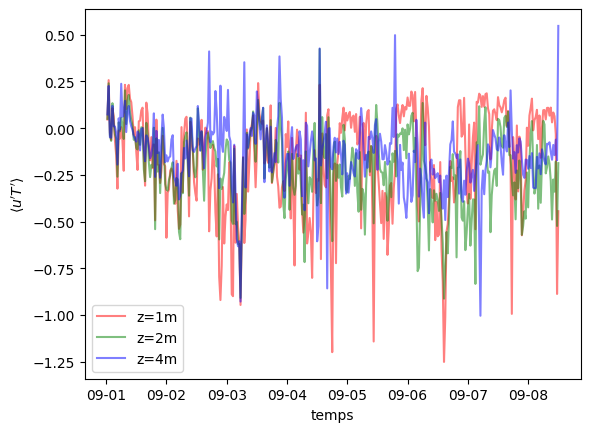

In [4]:
date_format=mpl.dates.DateFormatter("%m-%d")
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(T2_1_30min_brut.coords['temps'].values,T2_1_30min_brut['uts_cov'].values,
        color='r',label="z=1m",alpha=0.5)
ax.plot(T2_2_30min_brut.coords['temps'].values,T2_2_30min_brut['uts_cov'].values,
        color='g',label="z=2m",alpha=0.5)
ax.plot(T2_3_30min_brut.coords['temps'].values,T2_3_30min_brut['uts_cov'].values,
        color='b',label="z=4m",alpha=0.5)
#plt.axhline(200+30,color='r')
#plt.axhline(200-30,color='r')
ax.legend()
ax.set_xlabel("temps")
ax.set_ylabel(r"$\langle u'T' \rangle$")
ax.xaxis.set_major_formatter(date_format)

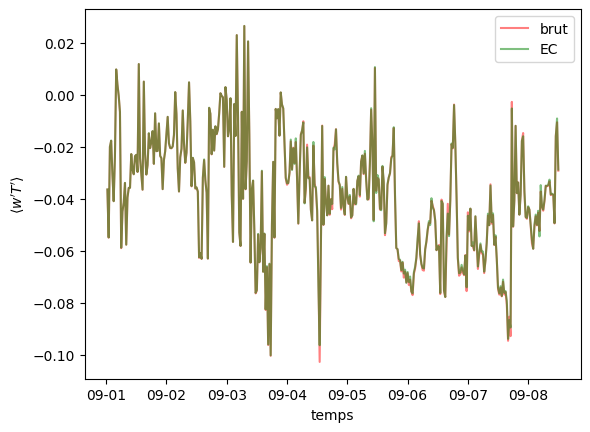

In [5]:
date_format=mpl.dates.DateFormatter("%m-%d")
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(T2_1_30min_brut.coords['temps'].values,T2_1_30min_brut['wts_cov'].values,
        color='r',label="brut",alpha=0.5)
ax.plot(T2_1_30min.coords['temps'].values,T2_1_30min['wts_cov'].values,
        color='g',label="EC",alpha=0.5)
ax.legend()
ax.set_xlabel("temps")
ax.set_ylabel(r"$\langle w'T' \rangle$")
ax.xaxis.set_major_formatter(date_format)

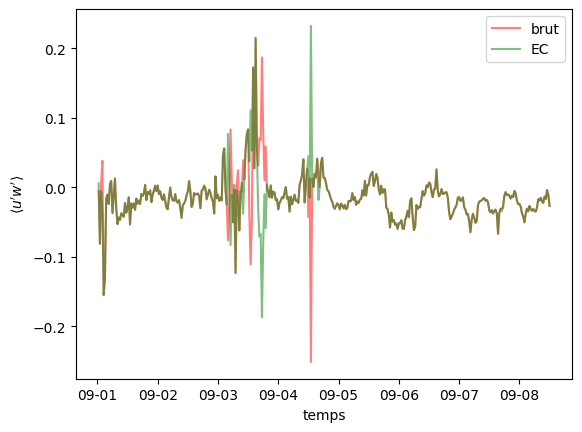

In [6]:
date_format=mpl.dates.DateFormatter("%m-%d")
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(T2_1_30min_brut.coords['temps'].values,T2_1_30min_brut['wu_cov'].values,
        color='r',label="brut",alpha=0.5)
ax.plot(T2_1_30min.coords['temps'].values,T2_1_30min['wu_cov'].values,
        color='g',label="EC",alpha=0.5)
ax.legend()
ax.set_xlabel("temps")
ax.set_ylabel(r"$\langle u'w' \rangle$")
ax.xaxis.set_major_formatter(date_format)

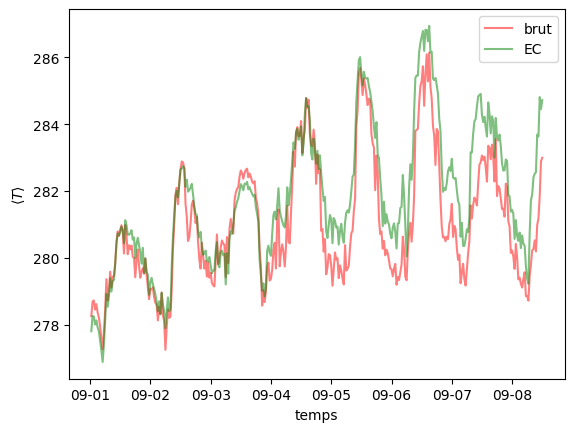

In [7]:
date_format=mpl.dates.DateFormatter("%m-%d")
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(T2_1_30min_brut.coords['temps'].values,T2_1_30min_brut['ts_mean'].values,
        color='r',label="brut",alpha=0.5)
ax.plot(T2_1_30min.coords['temps'].values,T2_1_30min['ts_mean'].values,
        color='g',label="EC",alpha=0.5)
ax.legend()
ax.set_xlabel("temps")
ax.set_ylabel(r"$\langle T \rangle$")
ax.xaxis.set_major_formatter(date_format)

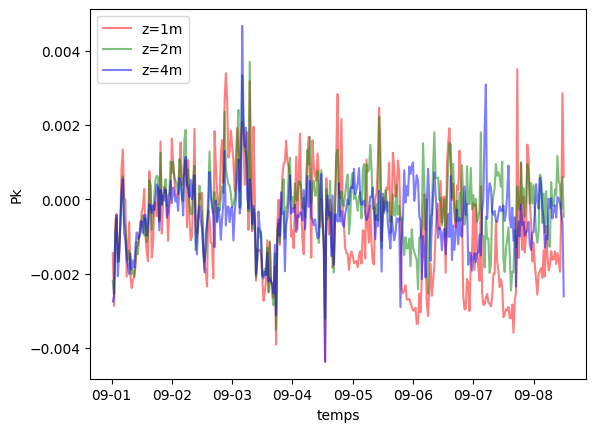

In [8]:
slope=np.radians(6.0)
Pk_func=lambda wT,uT,T,alpha:(9.81/T)*(wT*np.cos(alpha)-uT*np.sin(alpha))
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(T2_1_30min_brut.coords['temps'].values,
        Pk_func(T2_1_30min_brut['wts_cov'].values,T2_1_30min_brut['uts_cov'].values,T2_1_30min_brut['ts_mean'].values,slope),
        color='r',label="z=1m",alpha=0.5)
ax.plot(T2_2_30min_brut.coords['temps'].values,
        Pk_func(T2_2_30min_brut['wts_cov'].values,T2_2_30min_brut['uts_cov'].values,T2_2_30min_brut['ts_mean'].values,slope),
        color='g',label="z=2m",alpha=0.5)
ax.plot(T2_3_30min_brut.coords['temps'].values,
        Pk_func(T2_3_30min_brut['wts_cov'].values,T2_3_30min_brut['uts_cov'].values,T2_3_30min_brut['ts_mean'].values,slope),
        color='b',label="z=4m",alpha=0.5)
ax.legend()
ax.set_xlabel("temps")
ax.set_ylabel(r"Pk")
ax.xaxis.set_major_formatter(date_format)

(-1.0, 1.0)

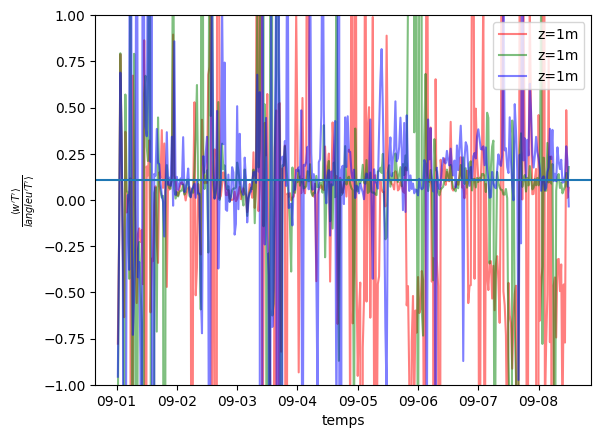

In [13]:
def cotan(x):
    return np.tan(x)
tan_theta=np.tan(slope)

fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(T2_1_30min_brut.coords['temps'].values,
        T2_1_30min_brut['wts_cov'].values/T2_1_30min_brut['uts_cov'].values,color='r',label="z=1m",alpha=0.5)
ax.plot(T2_2_30min_brut.coords['temps'].values,
        T2_2_30min_brut['wts_cov'].values/T2_2_30min_brut['uts_cov'].values,color='g',label="z=1m",alpha=0.5)
ax.plot(T2_3_30min_brut.coords['temps'].values,
        T2_3_30min_brut['wts_cov'].values/T2_3_30min_brut['uts_cov'].values,color='b',label="z=1m",alpha=0.5)
ax.legend()
ax.set_xlabel("temps")
ax.axhline(tan_theta)
ax.set_ylabel(r"$\frac{\langle w'T'\rangle}{langle u'T'\rangle}$")
ax.xaxis.set_major_formatter(date_format)
ax.set_ylim(-1,1)

In [14]:
print(f"tan(6) {tan_theta}")

tan(6) 0.10510423526567647
